<a href="https://colab.research.google.com/github/V5NEXT/TwitterSMT/blob/main/Twitter_SMT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
# Read data from file 'filename.csv' 
from google.colab import files
import csv
from itertools import groupby
import re
from textblob import TextBlob
from wordcloud import WordCloud 
from matplotlib import pyplot as plt






uploaded = files.upload()

Saving FieldHockey to FieldHockey (1)


In [ ]:
# f = open('FieldHockey')
# c = csv.reader(f)
# for row in c:
#   print(row)

  # for tweet in row:
  #   print(tweet)

with open('FieldHockey') as f:
  reader = csv.reader(f)
  tweets = []
  country = []
  for i in reader:
    for idx, word in enumerate(i):
      if idx==1:
         tweets.append(word)
      if idx==3:
         country.append(word)   
  
  # df = pd.DataFrame([tweets], columns=['Tweets','temp'])
  df = pd.DataFrame(tweets, columns=['Tweets'])
  df_country = pd.DataFrame(country, columns=['Country'])





    



In [ ]:

df_country.head()

,Country
0,[b'Kampala/ Uganda']
1,[b'India']
2,[b'']
3,"[b'South West, England']"
4,"[b'Mumbai, India']"


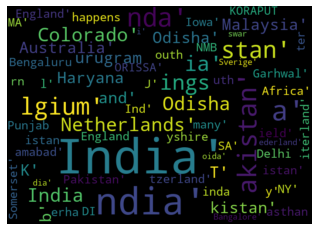

In [ ]:

def cleanCountry(text):
    text=re.sub(r'\\\S+','',text) # removes \

    return text

df_country['Country'] = df_country['Country'].apply(cleanCountry)

df_country['Country'] = df_country['Country'].str[3:]


#Create word cloud
df_country['Country'].drop_duplicates()
allWords=' '.join([country for country in df_country['Country']])
wordCloud = WordCloud(width=700,height=500, random_state=21,max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()


In [ ]:
def cleantweet(text):
  text=re.sub(r'@[A-Za-z0-9]+', '', text) #removes the @
  text=re.sub(r'#','',text) #removes the hashtags
  text=re.sub(r'RT[\s]+','', text) #removes RT
  text=re.sub(r'https?:\/\/\S+','',text) # removes hyperlinks
  text=re.sub(r'\\\S+','',text) # removes \
  text=re.sub(r'\_\S+','',text) # removes \

  text=text.lower()

  
  # text=re.sub(r'\\.*$', '', text)
  # filter(lambda x:x[0]!='\/', text.split())


  return text

df['Tweets']=df['Tweets'].apply(cleantweet)

df['Tweets'] = df['Tweets'].str[3:]


df



,Tweets,Subjectivity,Polarity
0,a beautiful sunday with our community kids hav...,0.600000,0.575000
1,tag someone who always pushes you to keep goin...,0.000000,0.000000
2,miss you guys and miss our real hockey team...,0.300000,0.200000
3,...... was that you with the goal?'],0.000000,0.000000
4,happy birthday to the pocket dynamo!!,1.000000,1.000000
...,...,...,...
318,smart work. marketing chakde,0.642857,0.214286
319,sohail bhai u r our hero'],0.000000,0.000000
320,hello my prayers with people of india. we are...,0.000000,0.000000
321,sir it's been long when we last watched hocke...,0.233333,-0.025000


In [ ]:
#subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity


df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)  

df

,Tweets,Subjectivity,Polarity
0,a beautiful sunday with our community kids hav...,0.600000,0.575000
1,tag someone who always pushes you to keep goin...,0.000000,0.000000
2,miss you guys and miss our real hockey team...,0.300000,0.200000
3,...... was that you with the goal?'],0.000000,0.000000
4,happy birthday to the pocket dynamo!!,1.000000,1.000000
...,...,...,...
318,smart work. marketing chakde,0.642857,0.214286
319,sohail bhai u r our hero'],0.000000,0.000000
320,hello my prayers with people of india. we are...,0.000000,0.000000
321,sir it's been long when we last watched hocke...,0.233333,-0.025000


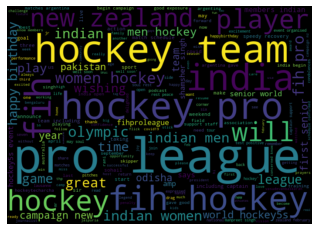

In [ ]:
#Create word cloud

df['Tweets'].drop_duplicates()

allWords=' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=700,height=500, random_state=21,max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
#Score calculating
def calculateScore(score):
  if score<0:
    return "Negative"
  elif score==0:
    return "Neutral"
  else:
    return "Positive" 

df['Analysis']= df['Polarity'].apply(calculateScore) 

df

,Tweets,Subjectivity,Polarity,Analysis
0,A beautiful Sunday with our community kids hav...,0.600000,0.575000,Positive
1,Tag someone who always pushes you to keep goin...,0.000000,0.000000,Neutral
2,_KARIM43 Miss you guys and miss our real Hoc...,0.300000,0.200000,Positive
3,_irfan04 _irfan04 ...... was that you with t...,0.000000,0.000000,Neutral
4,Happy Birthday to the pocket dynamo!! \xf0\x9...,1.000000,1.000000,Positive
...,...,...,...,...
318,Smart work. Marketing \n ChakDe \xe2\x9c\x8c\...,0.642857,0.214286,Positive
319,Sohail bhai u r our hero'],0.000000,0.000000,Neutral
320,Hello my Prayers with people of India. We are...,0.000000,0.000000,Neutral
321,Sir it's been long when we last watched Hocke...,0.233333,-0.025000,Negative


In [ ]:
#Print All Postive tweets

j=1
sortedDf = df.sort_values(by=['Polarity'])
for i in range(0, sortedDf.shape[0]):
  if(sortedDf['Analysis'][i]=="Positive"):
    print(str(j)+ ' ' +sortedDf['Tweets'][i])
    print()
    j=j+1

sortedDf


1 A beautiful Sunday with our community kids having fun \xe2\x98\xba\xef\xb8\x8f. \nhappy _Academy _Hockey \xe2\x80\xa6 

2  _KARIM43  Miss you guys and miss our real Hockey team which were unbeatable \xe2\x9d\xa4\xef\xb8\x8f\xe2\x9d\xa4\xef\xb8\x8f\xf0\x9f\x98\xa2\xf0\x9f\x98\xa2']

3  Happy Birthday to the pocket dynamo!! \xf0\x9f\x92\x90']

4  Happy Birthday \xf0\x9f\x8e\x82']

5  Happy Birthday ! NilakantaSharma \xf0\x9f\x8e\x88']

6 The fixture for the FIH Pro League 2021-22 is out.  to start its campaign in Feb 2022 against New Ze\xe2\x80\xa6 

7 India to open 2021-22 FIH Pro League campaign against New Zealand on February 5 | Hockey News \xe2\x80\x93 Times of\xc2\xa0India 

8 Happy birthday \xf0\x9f\x8e\x89\xf0\x9f\x8e\x82 to my elder brother may Allah give you healthy life. _arshad_olympion \n\xe2\x80\xa2asian games gold m\xe2\x80\xa6 

9   _Ali is simply outstanding. Mind blowing drag flick left Indians totall\xe2\x80\xa6 

10    I was teenager in the 90s and loved our Hockey 

,Tweets,Subjectivity,Polarity,Analysis
209,Unfortunately now the difference in the qu...,1.00,-0.50,Negative
134,So sad'],1.00,-0.50,Negative
20,I saw Fisher and Bowlender (sorry if I write...,0.95,-0.50,Negative
136,"Translate the Japanese and read this article, ...",0.45,-0.45,Negative
146,"After 438 days without a game, the USWNT will ...",0.40,-0.40,Negative
...,...,...,...,...
85,Happy birthday Pal!!!!'],1.00,1.00,Positive
42,East and west Sohail Abbas at the best by pl...,0.30,1.00,Positive
9,Happy Birthday ! NilakantaSharma \xf0\x9f\x8e...,1.00,1.00,Positive
4,Happy Birthday to the pocket dynamo!! \xf0\x9...,1.00,1.00,Positive


In [ ]:
#Print All Negative tweets

j=1
sortedDf = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDf.shape[0]):
  if(sortedDf['Analysis'][i]=="Negative"):
    print(str(j)+ ' ' +sortedDf['Tweets'][i])
    print()
    j=j+1

sortedDf

1   I saw Fisher and Bowlender (sorry if I write the spelling wrong) on panelty corners\xe2\x80\xa6 

2   I watched that game and when PAKISTAN scored this goal I just couldn't control my emotions and excitement"]

3   Missing hockey\xf0\x9f\x92\x94']

4   This was probably the last occasion when we gave them tough time.']

5   Currently bismal situation of Pakistan hockey makes us all very sad and concern....\xe2\x80\xa6 

6 This is how Pakistan shatter indian oppressor's dreams in Common Wealth Games with a last Second goal.\xe2\x80\xa6 

7 Olympic Qualifier Round Amsterdam Nederlands    _Jatt\xe2\x80\xa6 

8 \xe2\x98\xb8\xef\xb8\x8f| FIH | This week's game at the Brisbane Women\xe2\x80\x99s Hockey Association (BWHA) Premier League 1 in Australia betwe\xe2\x80\xa6 

9 This week's game at the Brisbane Women\xe2\x80\x99s Hockey Association (BWHA) Premier League 1 in Australia between St.Andrews\xe2\x80\xa6 

10         So sad']

11 Translate the Japanese and read this article, which te

,Tweets,Subjectivity,Polarity,Analysis
209,Unfortunately now the difference in the qu...,1.00,-0.50,Negative
134,So sad'],1.00,-0.50,Negative
20,I saw Fisher and Bowlender (sorry if I write...,0.95,-0.50,Negative
136,"Translate the Japanese and read this article, ...",0.45,-0.45,Negative
146,"After 438 days without a game, the USWNT will ...",0.40,-0.40,Negative
...,...,...,...,...
85,Happy birthday Pal!!!!'],1.00,1.00,Positive
42,East and west Sohail Abbas at the best by pl...,0.30,1.00,Positive
9,Happy Birthday ! NilakantaSharma \xf0\x9f\x8e...,1.00,1.00,Positive
4,Happy Birthday to the pocket dynamo!! \xf0\x9...,1.00,1.00,Positive


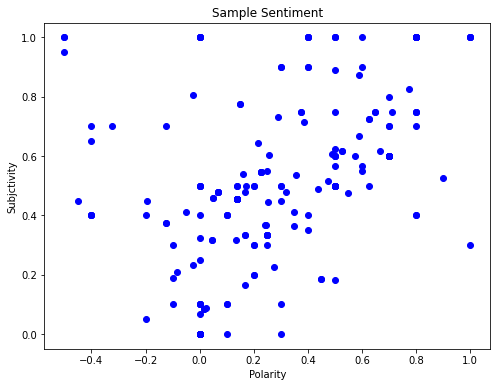

In [ ]:
plt.figure(figsize=(8,6))

for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')
 

plt.title('Sample Sentiment')
plt.xlabel('Polarity')
plt.ylabel('Subjctivity')
plt.show() 

In [ ]:
#get Postive tweet %

ptweets = df[df.Analysis == "Positive"]
ptweets = ptweets['Tweets']


round( ( ptweets.shape[0]/df.shape[0])*100,1 )


48.0

In [ ]:
#get Negative tweet %

ntweets = df[df.Analysis == "Negative"]
ntweets = ntweets['Tweets']


round( ( ntweets.shape[0]/df.shape[0])*100,1 )

7.4

In [ ]:
#get Neutral tweet %

nltweets = df[df.Analysis == "Neutral"]
nltweets = nltweets['Tweets']


round( ( nltweets.shape[0]/df.shape[0])*100,1 )

44.6

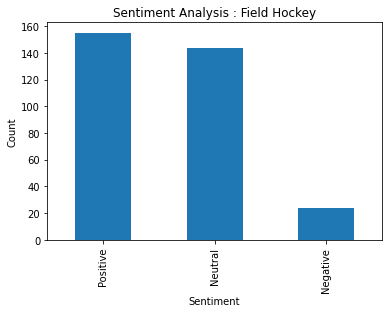

In [ ]:
df['Analysis'].value_counts()


plt.title('Sentiment Analysis : Field Hockey')
plt.xlabel('Sentiment')
plt.ylabel('Count')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
# df = pd.DataFrame([tweet.full_text for tweet in log], coloumns="tweets")
# df.head()